# Perplexity

### Pseudo code:

```
log_perplexity = log(perplexity)
for i=1:N
    for iter=1:200 (assumption)
        for j=1:N  
            P[i][j]= exp(-beta * DD[i][j]
            sum_P += P[i][j]
            H += beta * DD[i][j] * P[i][j]
        H = H/sum_P + log(sum_P)
        Hdiff = H - log_perplexity
        beta_min or beta_max = beta
        beta = (beta_min + beta_max) *= 0.5
        
```

### Cost division
* adds: $N \cdot 200 \cdot (2N + 3)$
* mults: $N \cdot 200  \cdot (3N + 1)$
* divisions: $N \cdot 200 $
* exp and log: $1 + N \cdot 200 \cdot (N+1)$

Total cost: $$W = N \cdot 200 \cdot (6N + 6) + 1 \space \text{flops}$$

### Memory traffic

For every iteration a whole row of the distance matrix DD gets read. 

$$ Q = N \cdot 200 \cdot N $$


And so the operational intensity is:
$$I \approxeq 6  \space \text{flops/byte}$$


In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from visualization import plot

mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

In [30]:
# Define fixed variables of the problem
T = 1000

Lets define the flops depending on the input size.

In [31]:
def get_flops(N):
    W =  N * 200 * (6*N + 6) + 1
    return W

Lets import the runtime of each function.

In [32]:
data = pd.read_csv("./bench.csv")
data

N  base_version  subexpression and strength reduction     unrolling  \
0      8  2.850610e+05                          2.475620e+05  2.722420e+05   
1     16  8.786370e+05                          8.262830e+05  8.082900e+05   
2     32  2.747062e+06                          3.214211e+06  2.683256e+06   
3     64  6.247798e+06                          6.228748e+06  6.124484e+06   
4    128  2.724863e+07                          2.403652e+07  2.575540e+07   
5    256  1.030571e+08                          1.053169e+08  1.055955e+08   
6    512  4.167737e+08                          4.087540e+08  4.528725e+08   
7   1024  2.241671e+09                          2.086233e+09  2.113764e+09   
8   2048  1.382000e+10                          1.445349e+10  1.258751e+10   
9   4096  9.203266e+10                          8.820218e+10  9.013775e+10   
10  8192  4.608291e+11                          4.683451e+11  4.222642e+11   

        blocking  
0   2.097290e+05  
1   6.665020e+05  
2   2.300734e+06  
3   6.462079e+06  
4   2.641159e+07  
5   1.042226e+08  
6   4.144808e+08  
7   2.314990e+09  
8   1.418663e+10  
9   1.023225e+11  
10  5.114466e+11

In [37]:
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

In [39]:
cache_1 = 32 * 2**10    # 32 KB
cache_2 = 256 * 2**10   # 256 KB
cache_3 = 8 * 2**20.    # 8 MB


N_cache1 = np.sqrt(cache_1 / 4 / 2)
N_cache2 = np.sqrt(cache_2 / 4 / 2)
N_cache3 = np.sqrt(cache_3 / 4 / 2)
print(f"Cache 1 limit size: {N_cache1}")
print(f"Cache 2 limit size: {N_cache2}")
print(f"Cache 3 limit size: {N_cache3}")

Cache 1 limit size: 64.0
Cache 2 limit size: 181.01933598375618
Cache 3 limit size: 1024.0


## Benchmark 

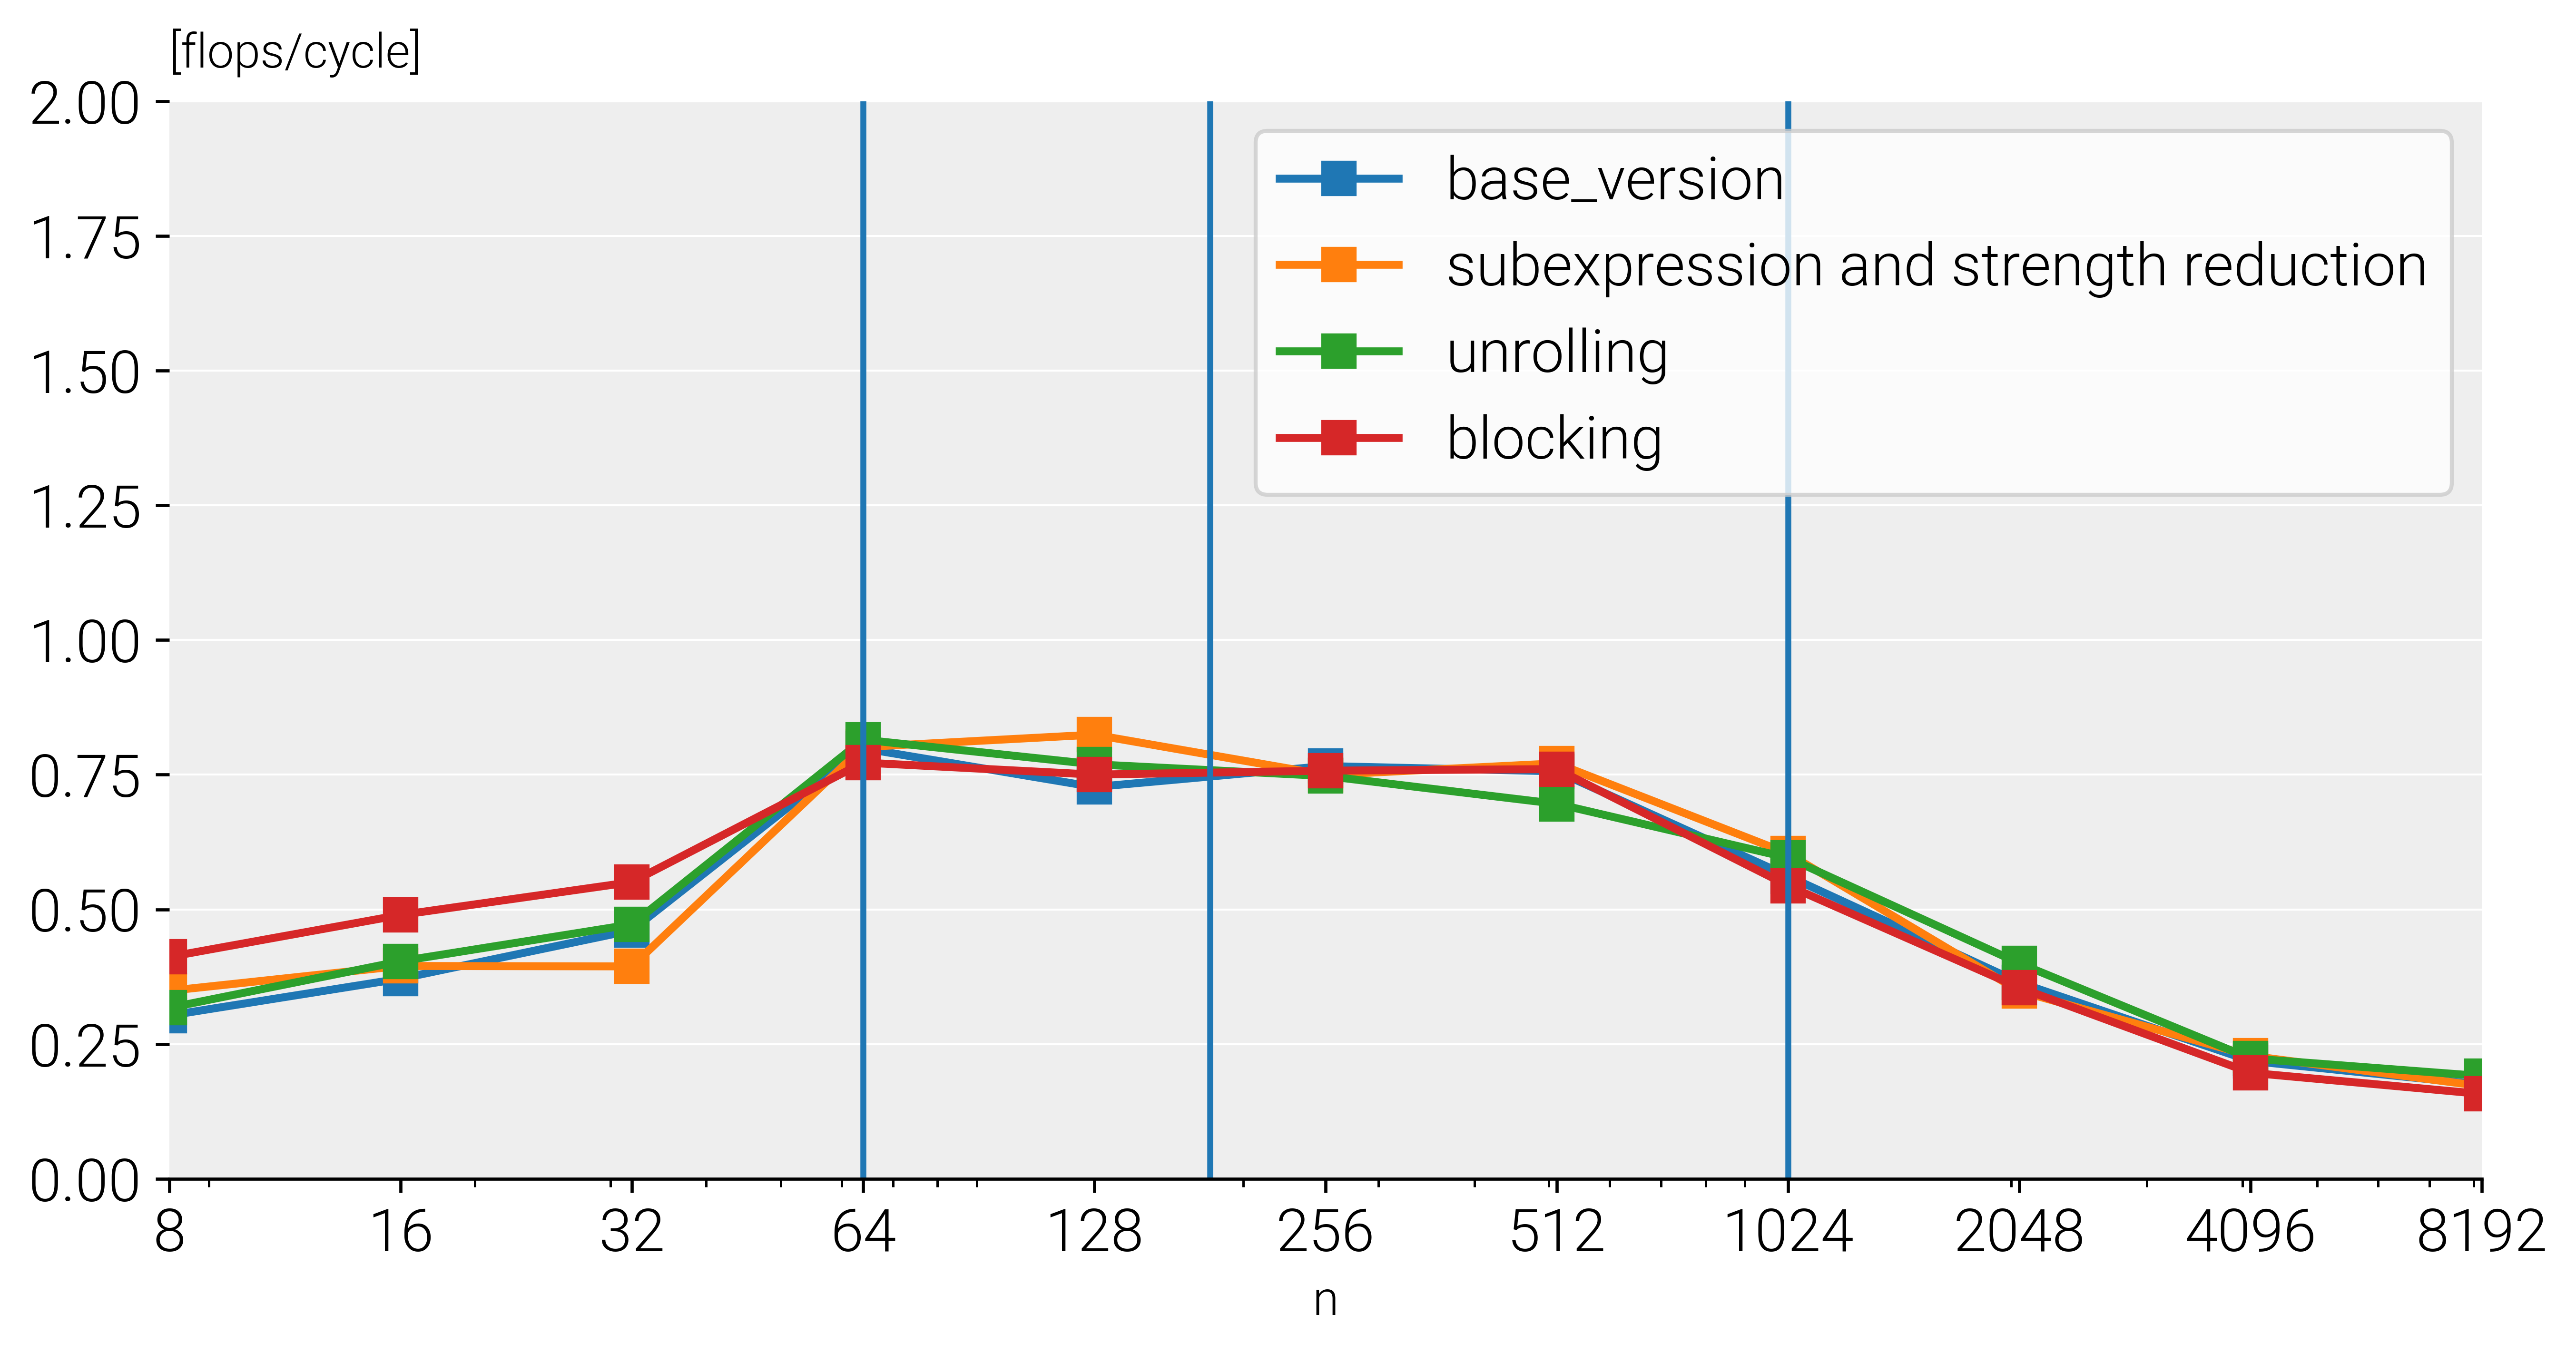

In [40]:
data = pd.read_csv("./bench.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

## Benchmark 3

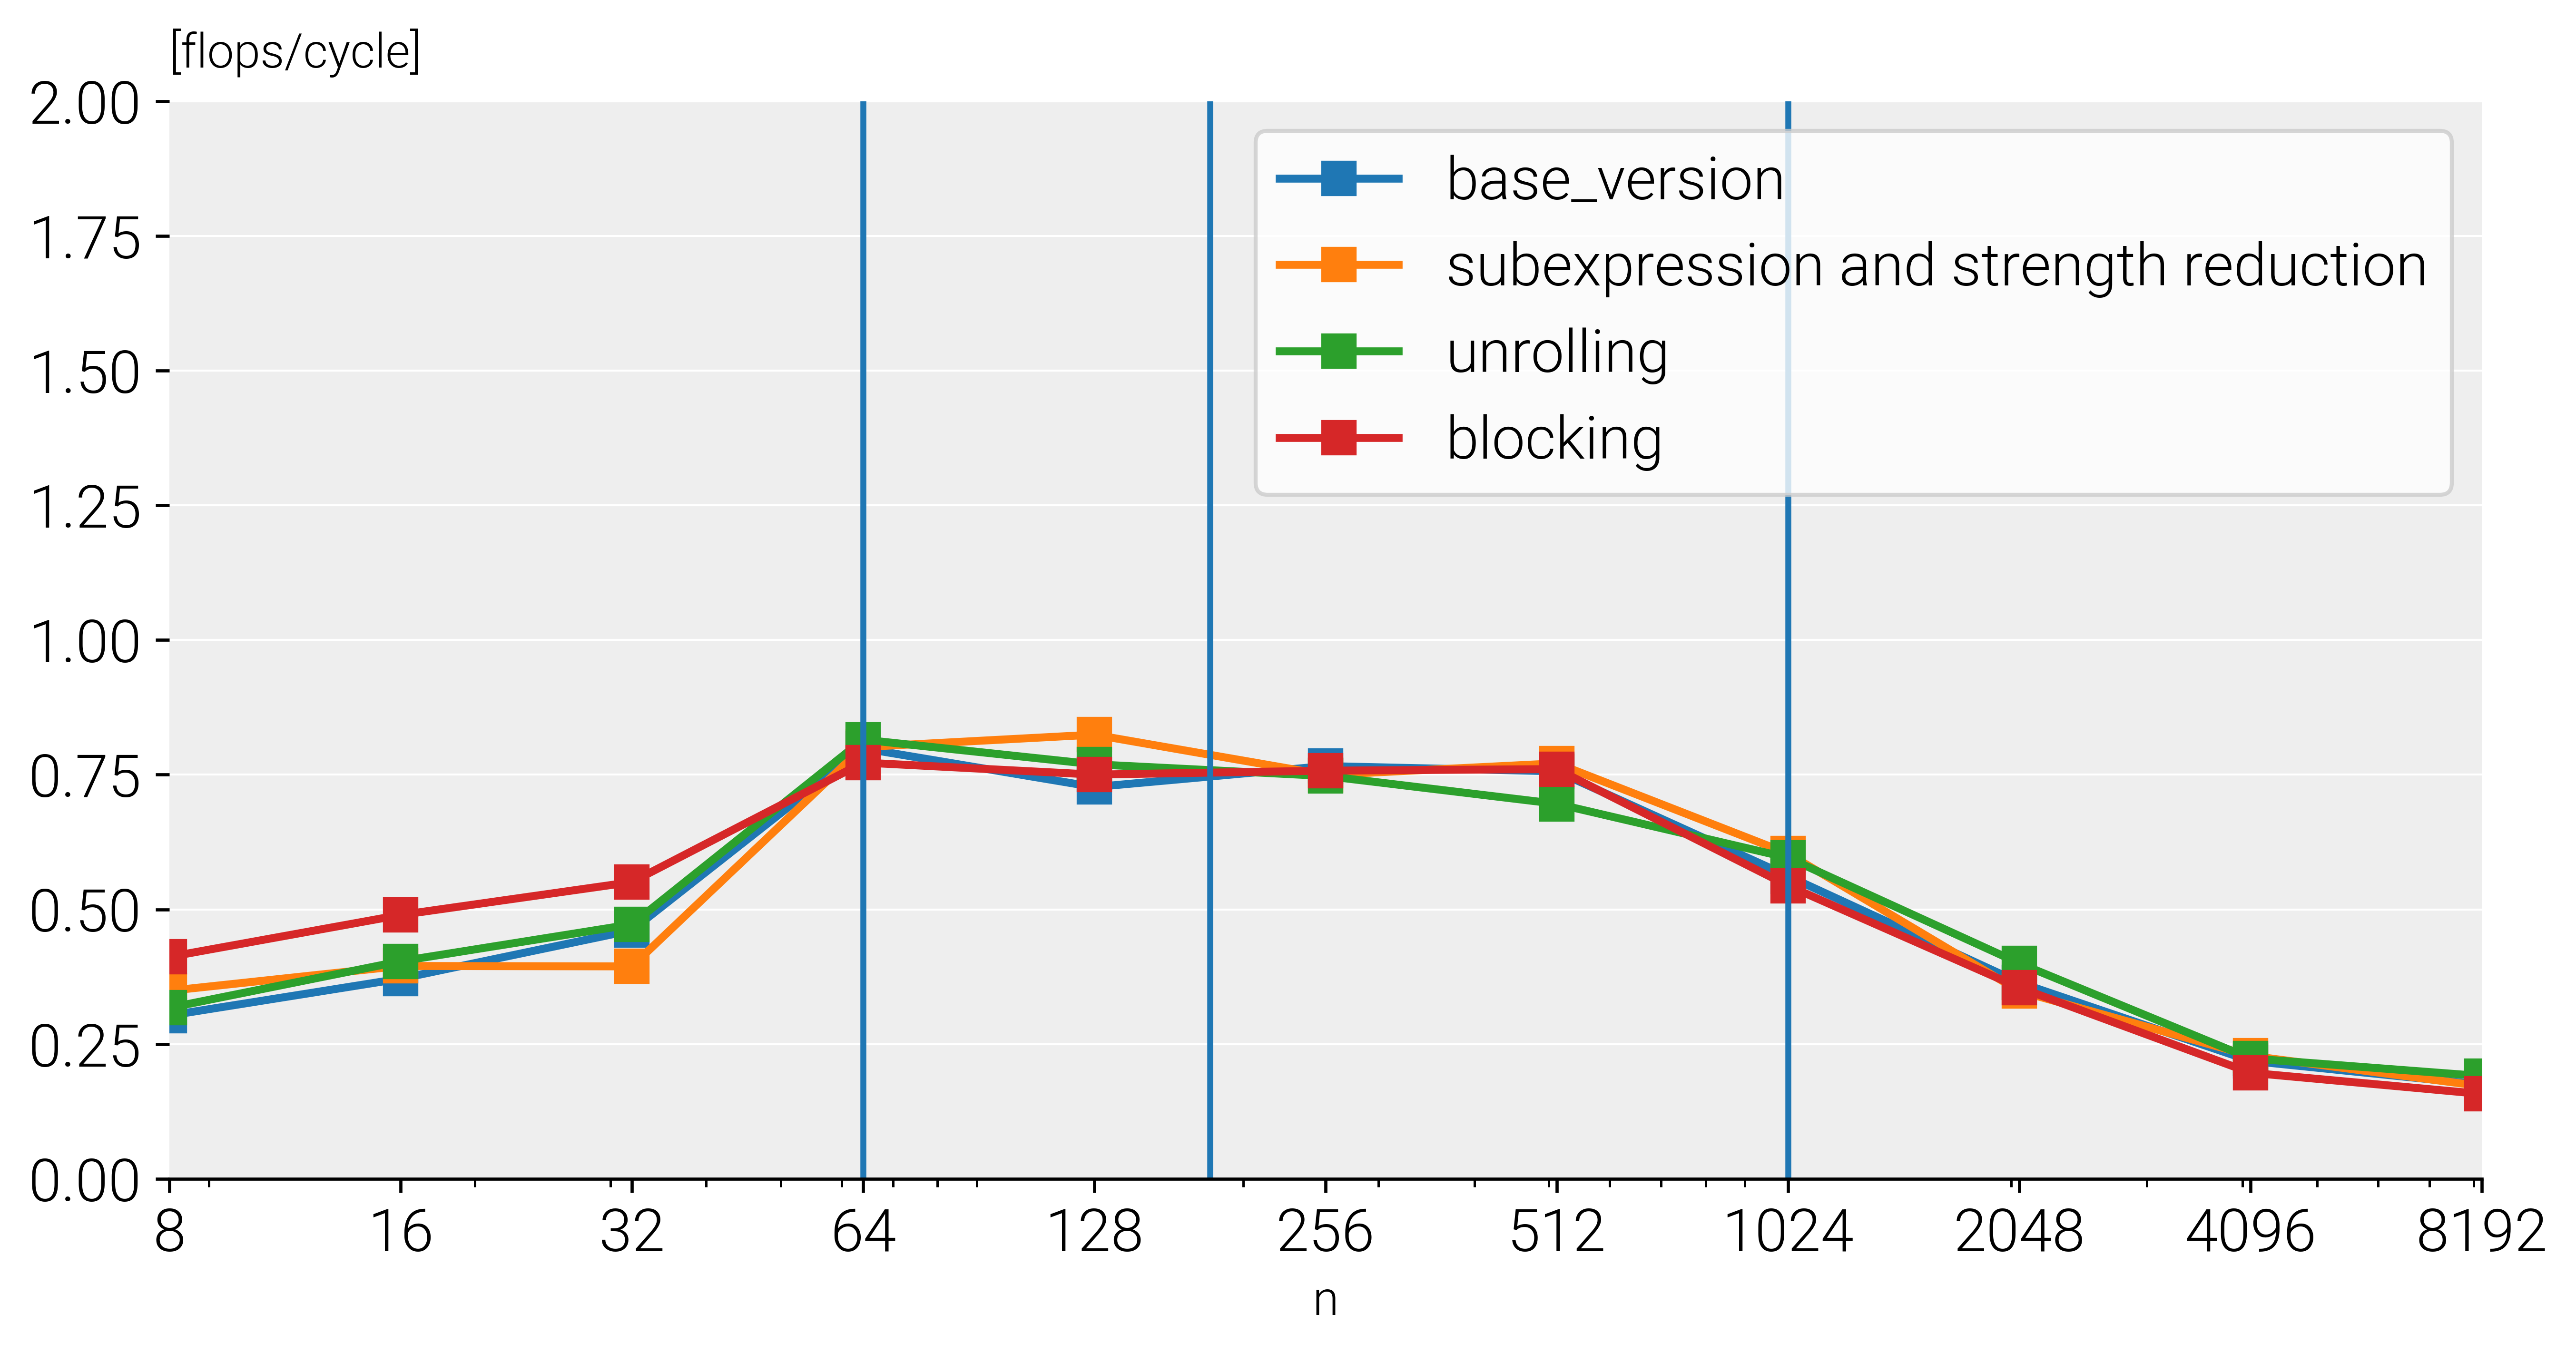

In [41]:
data = pd.read_csv("./bench.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

## Benchmark 4

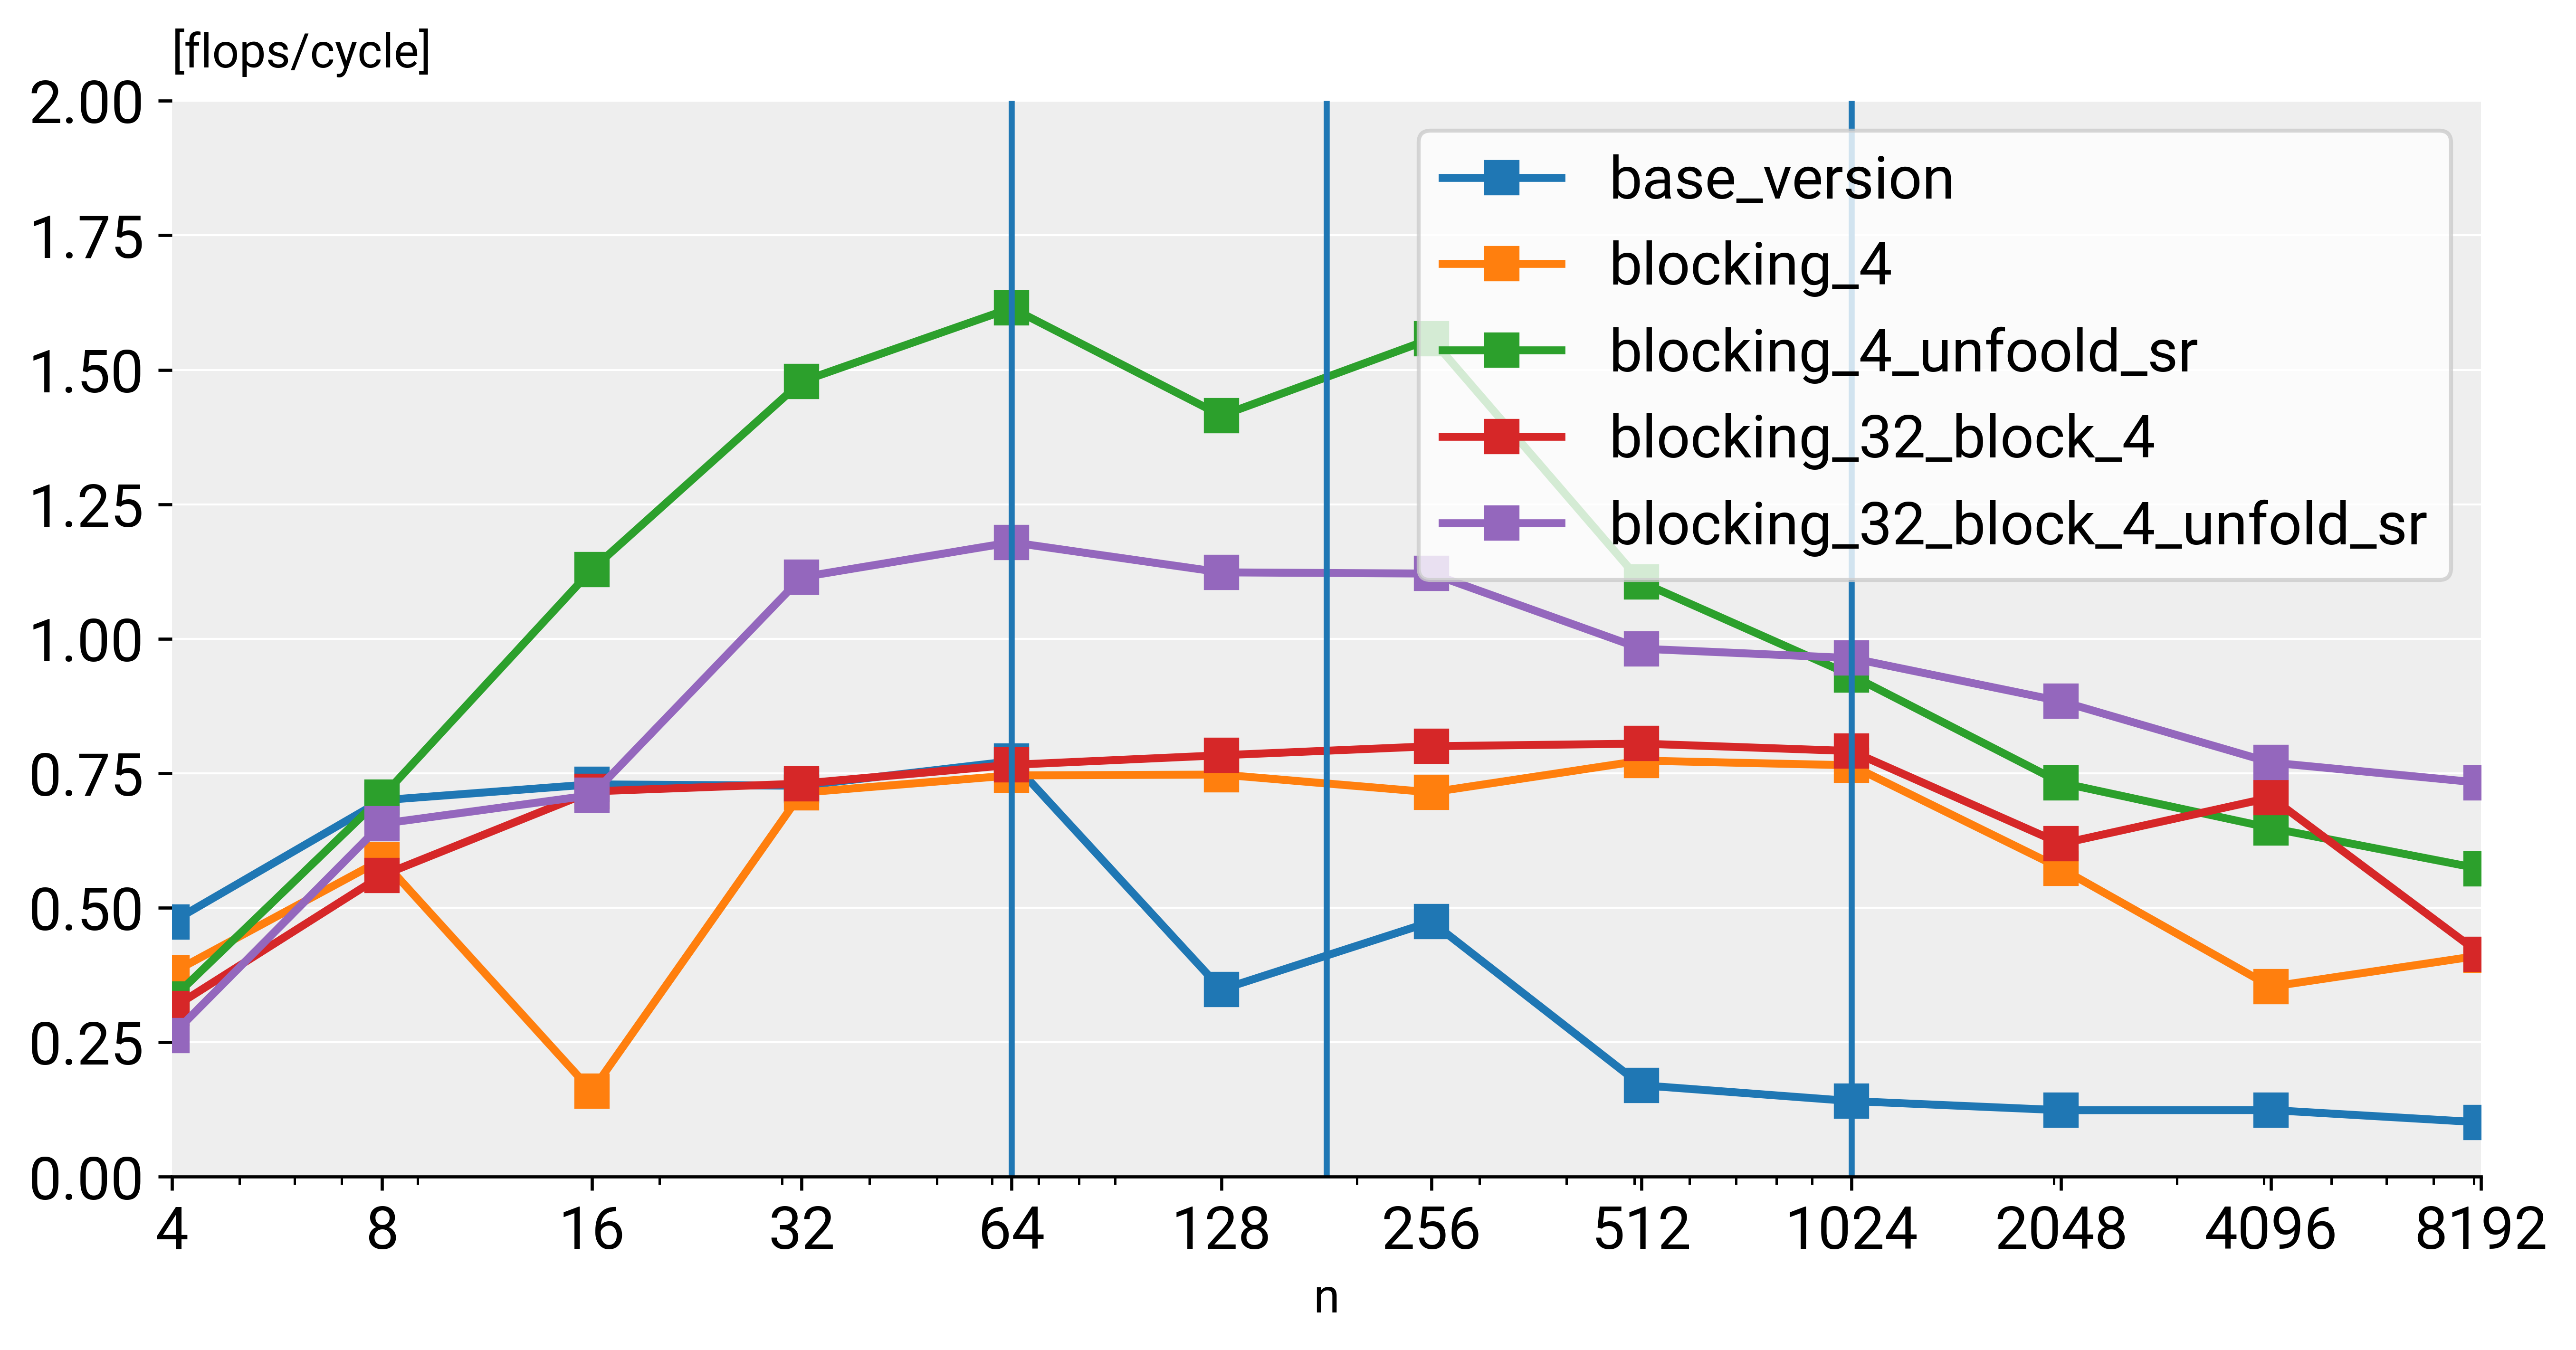

In [19]:
data = pd.read_csv("./bench4.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)

ax = plot(N, perf, labels=func_names, ylim=2)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

# Benchmark 5

Here there has been implemented the vectorized computations for the smaller block of 4 by 4.

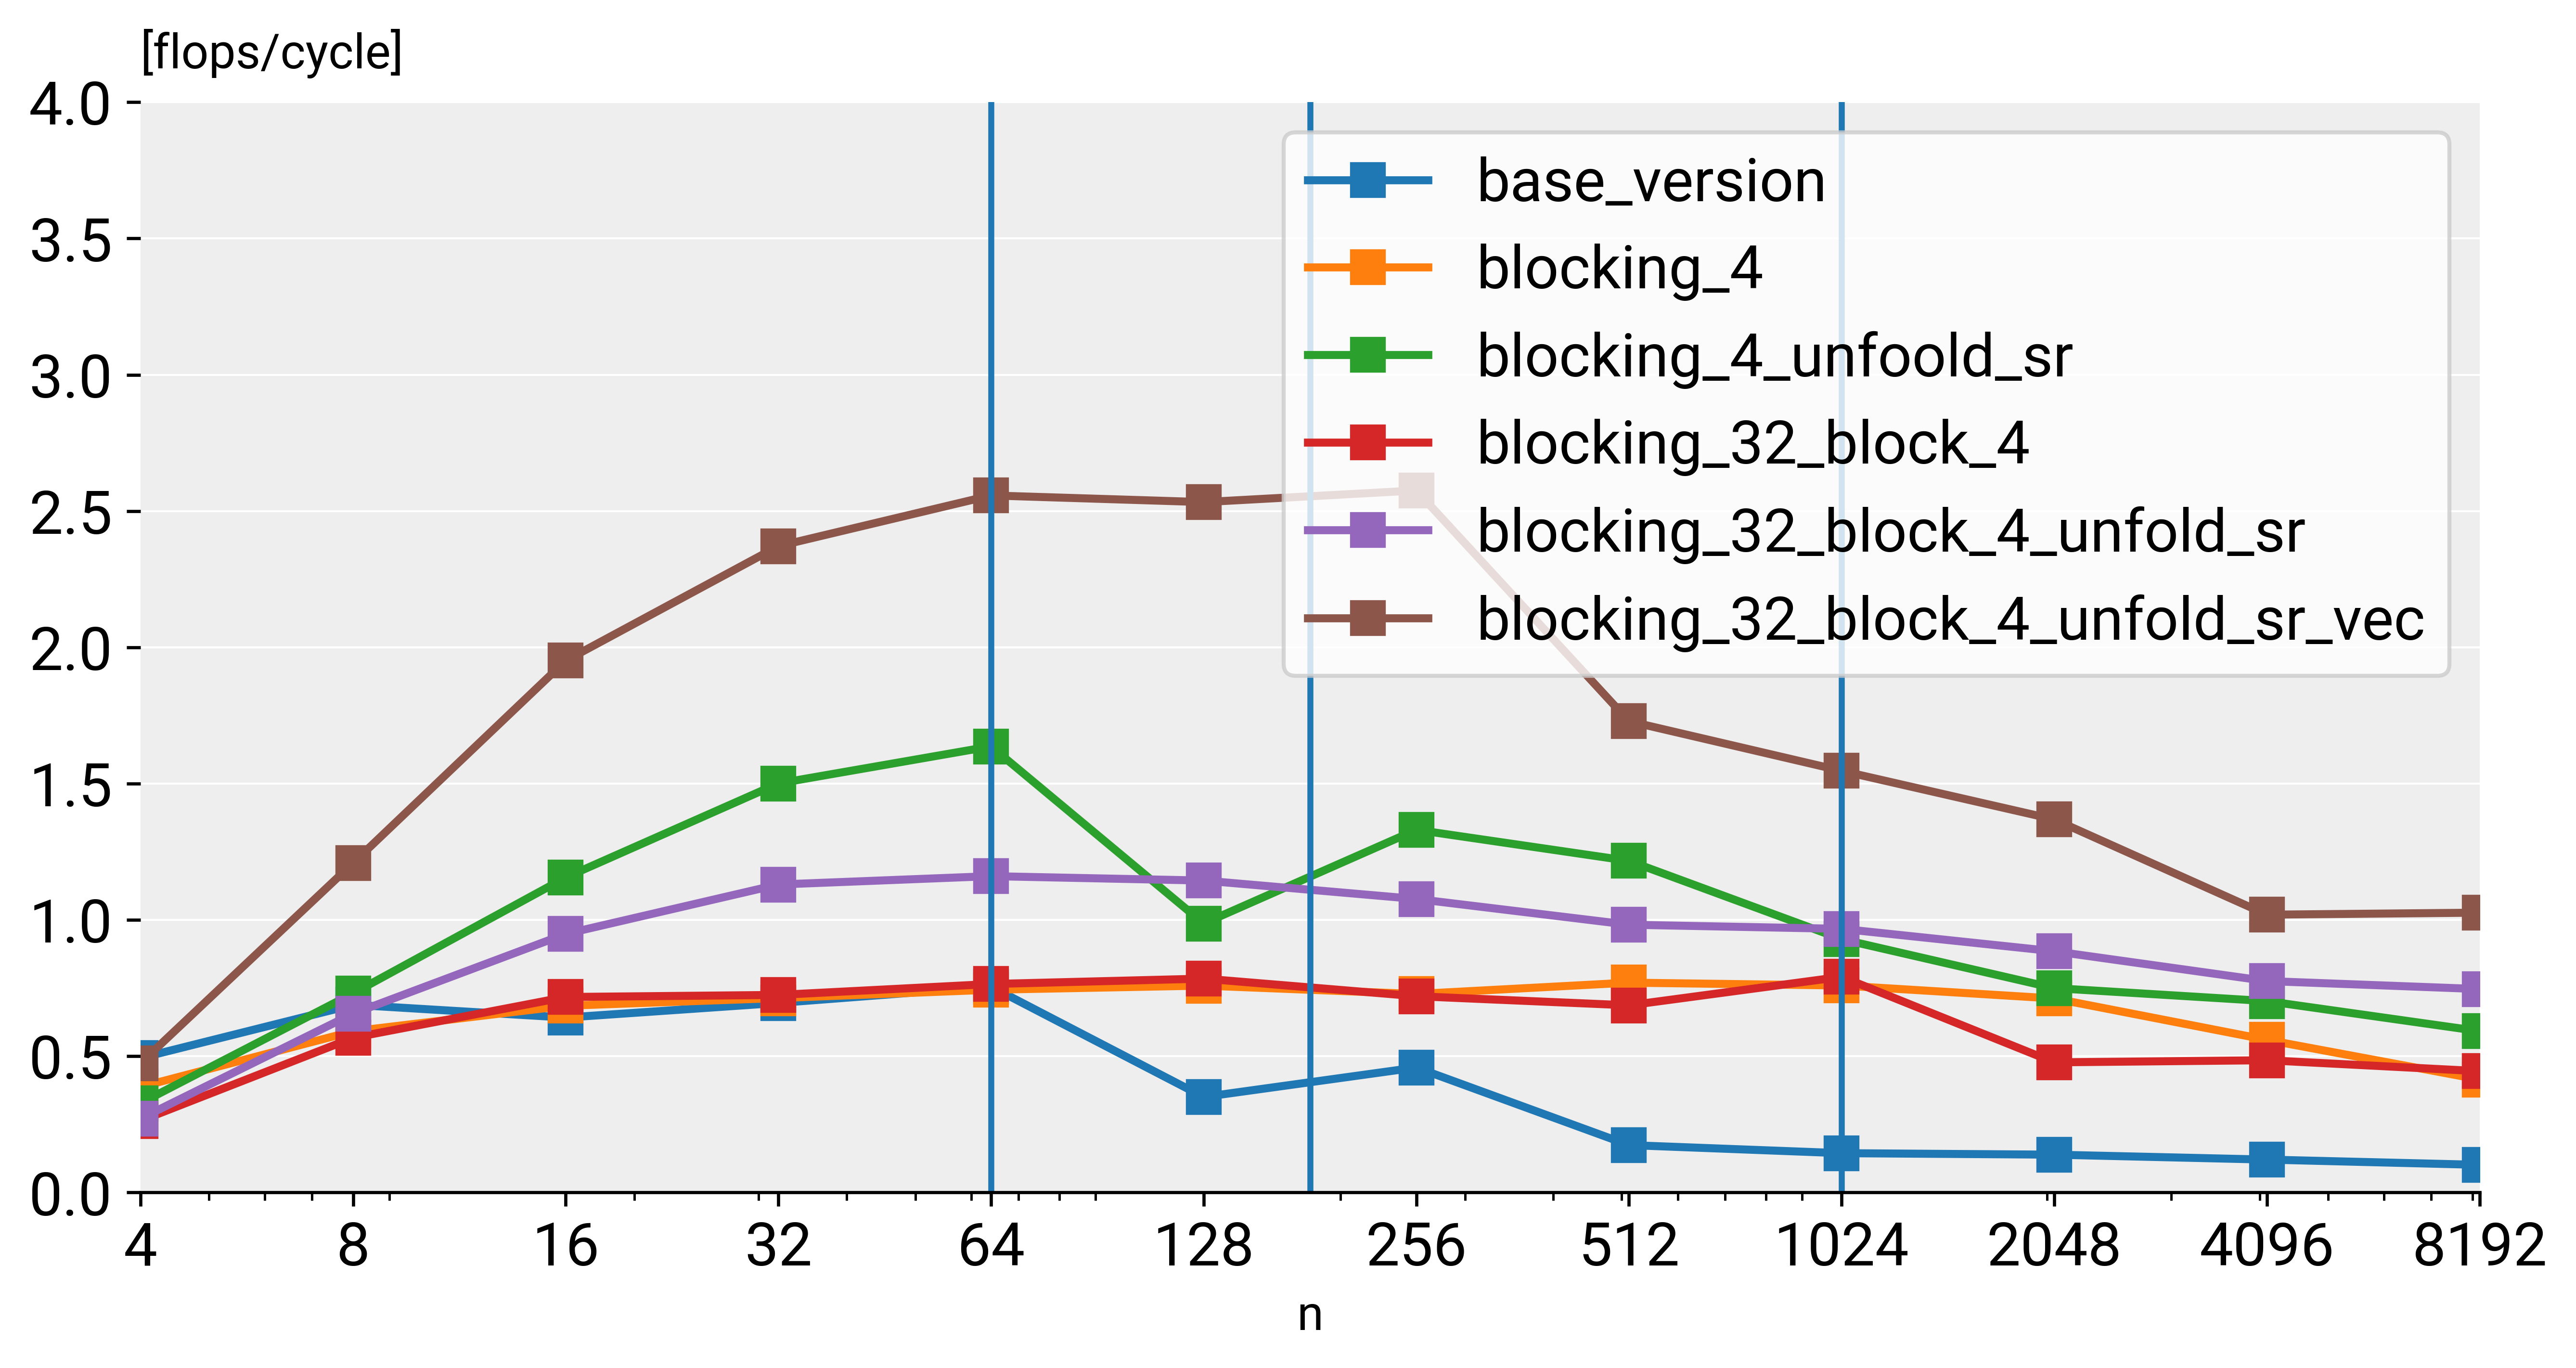

In [22]:
data = pd.read_csv("./bench5.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=4)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

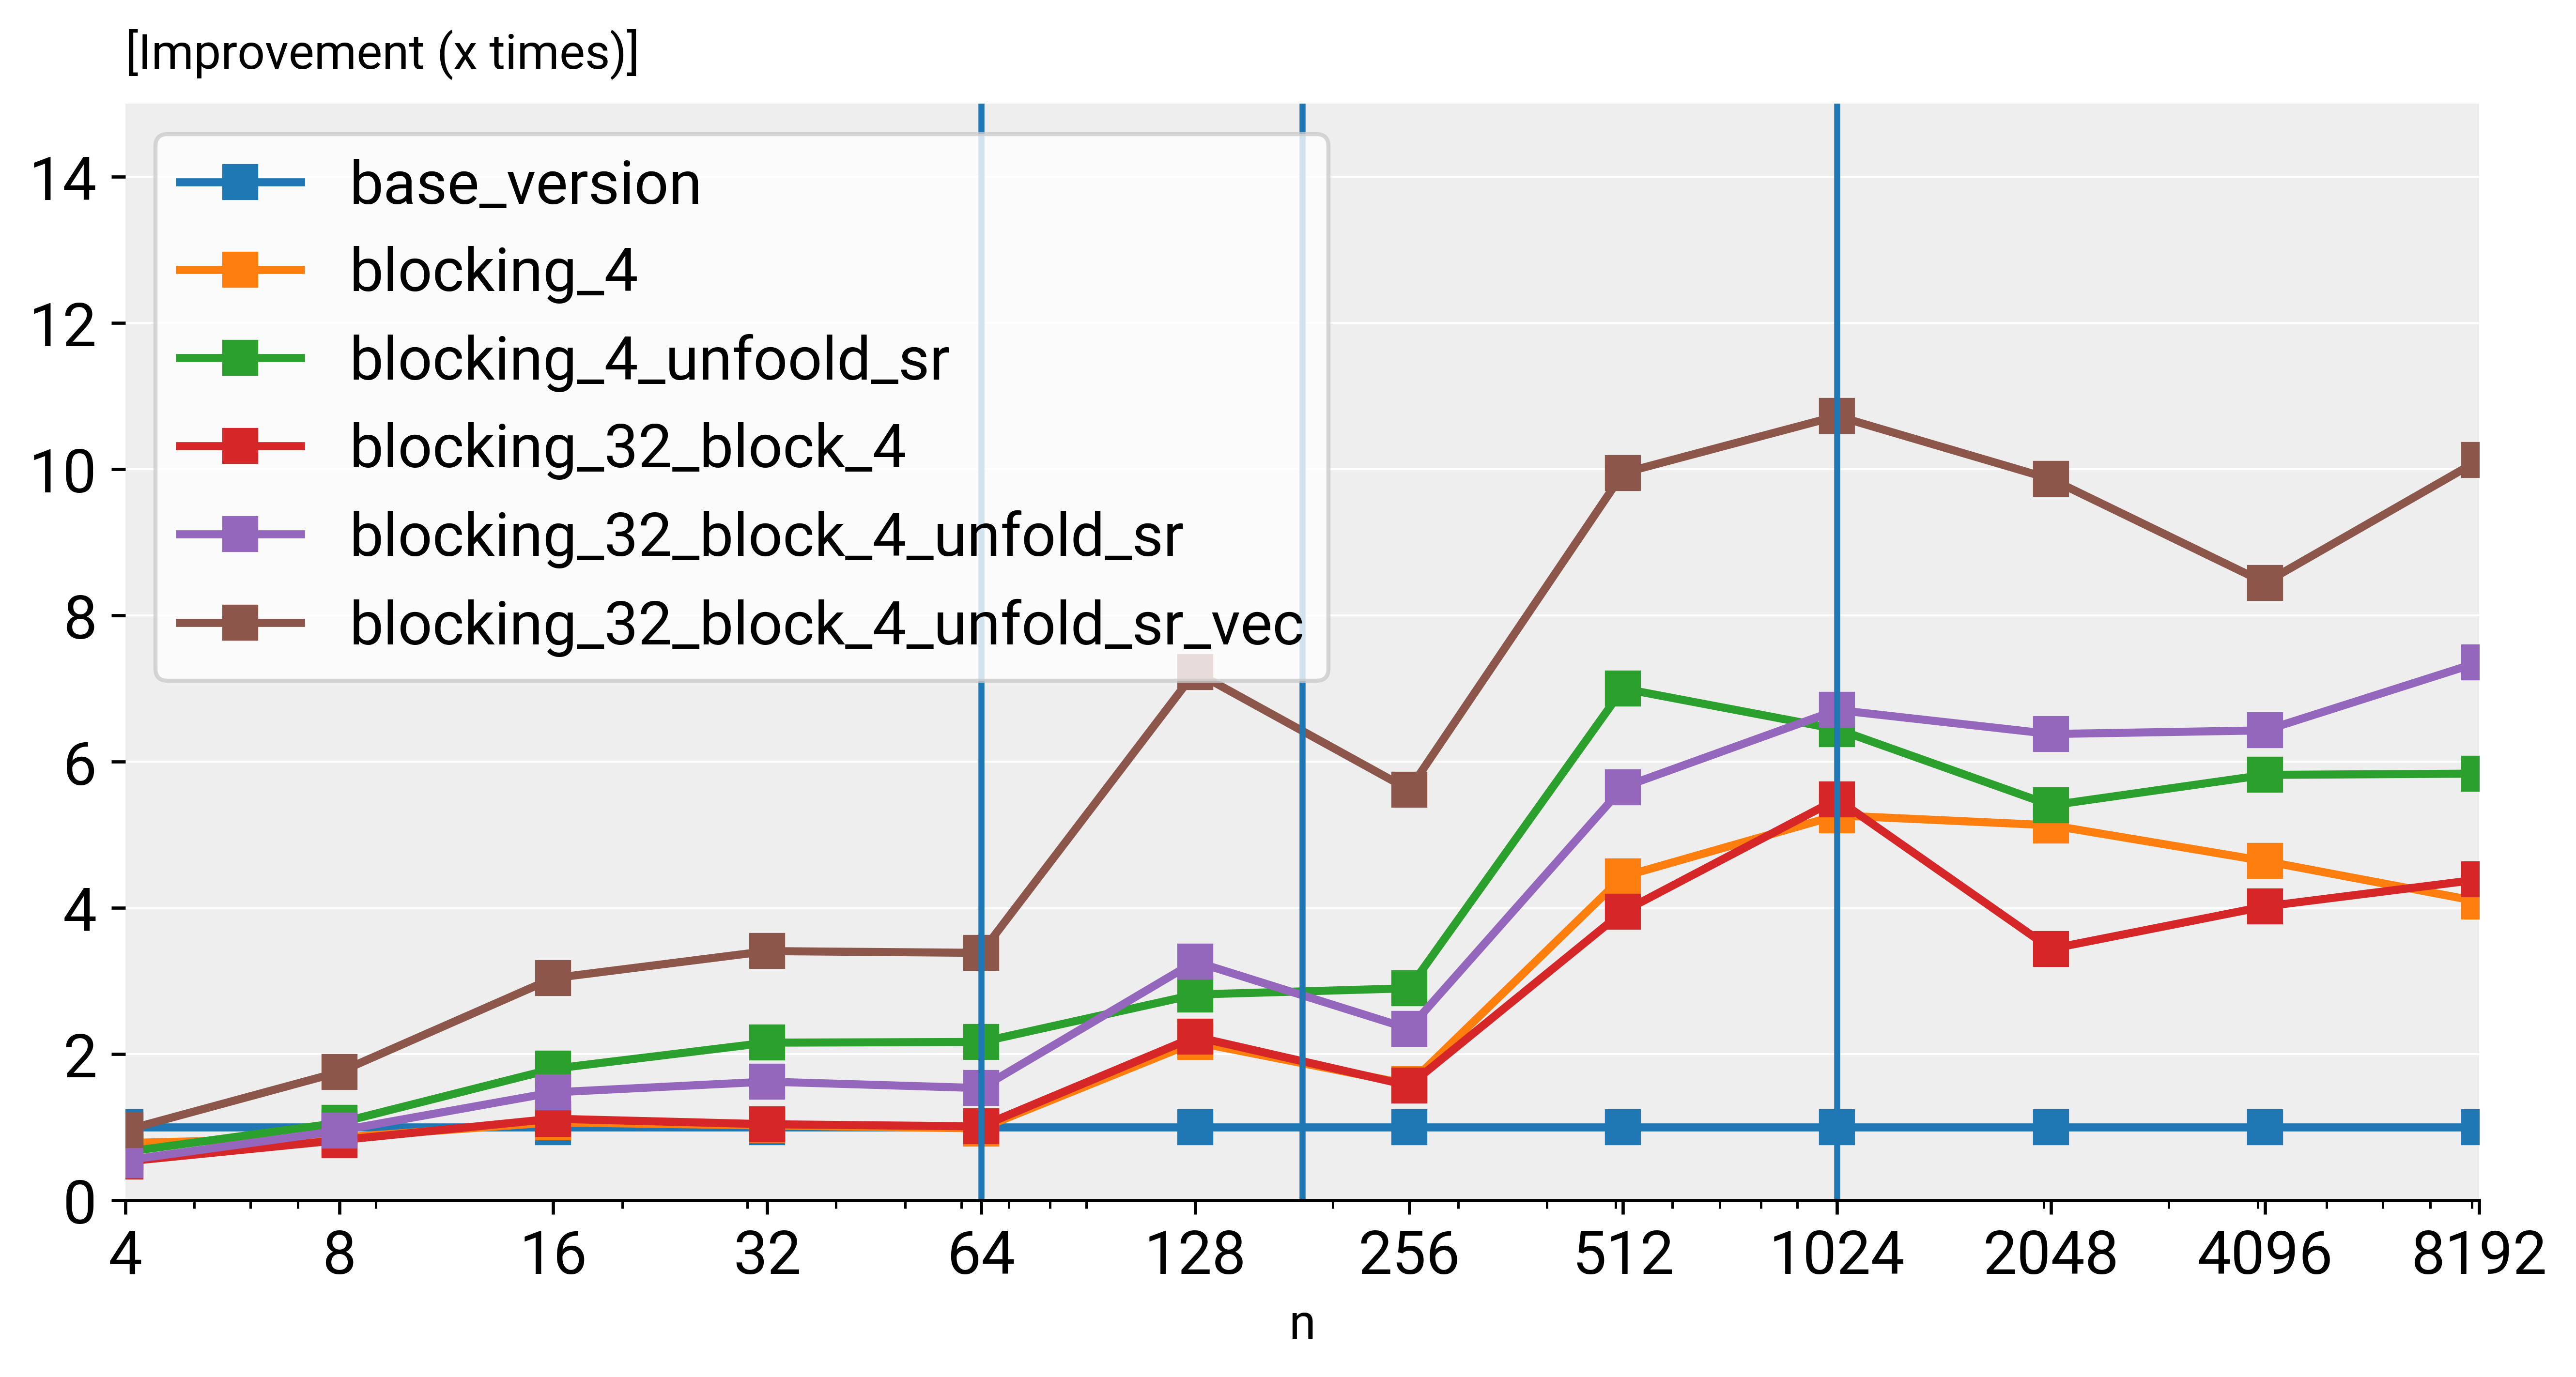

In [24]:
ax = plot(N, perf / perf[0,:], labels=func_names, ylim=15, ylabel="Improvement (x times)")
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

# Benchmark 6

Use different block sizes for blocking and microblocking.

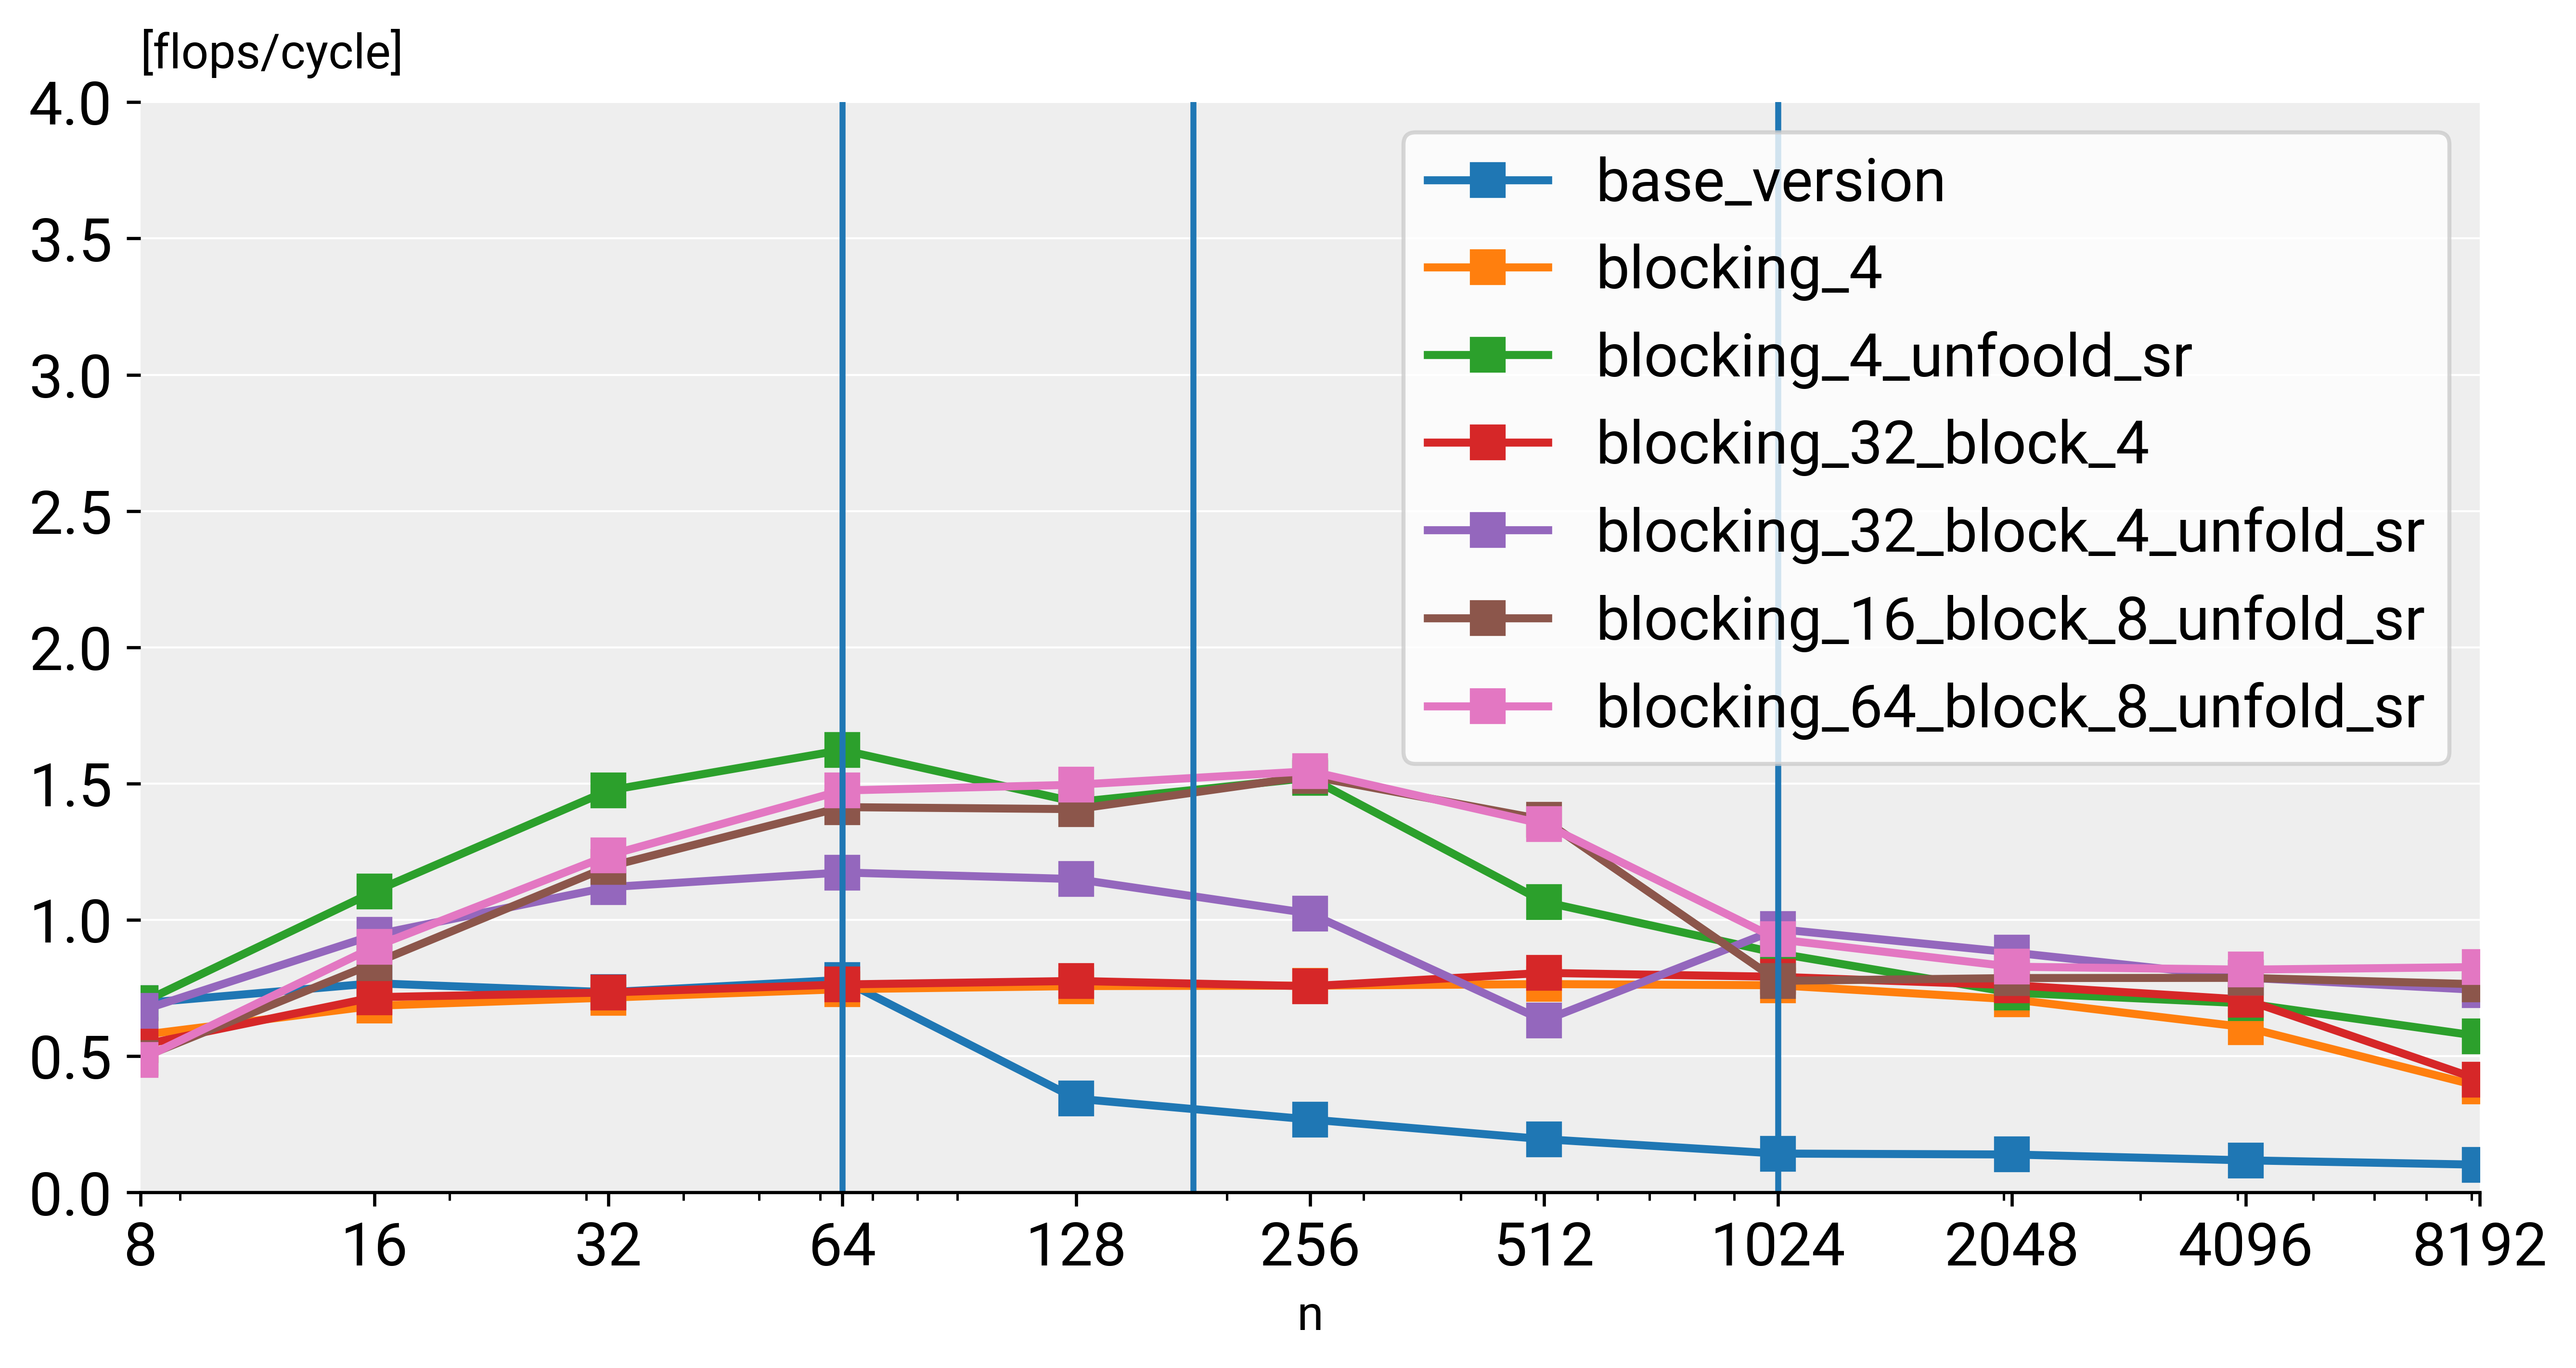

In [25]:
data = pd.read_csv("./bench6.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = get_flops(N)

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=4)
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()